In [ ]:
import Fun_BsplineBasis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cpsplines.fittings.fit_cpsplines import CPsplines
from cpsplines.psplines import bspline_basis
import time
from scipy.stats import sem
from Fun_CPsplines_intercept_lib import Fun_CPsplines_intercept
from Fun_CPsplines_libreria import Fun_CPsplines
import rpy2.robjects as robjects

In [ ]:
nombres_filas = [35, 75, 125]
nombres_columnas = ["0.01", "0.05"]

IMSE_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_Restricciones_Normal[:] = np.nan

IMSE_sd_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_sd_Restricciones_Normal[:] = np.nan

IMSE_2_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_2_Restricciones_Normal[:] = np.nan

IMSE_2_sd_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_2_sd_Restricciones_Normal[:] = np.nan

MSE_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
MSE_Restricciones_Normal[:] = np.nan

MSE_sd_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
MSE_sd_Restricciones_Normal[:] = np.nan

Tiempo_Restricciones_Normal = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
Tiempo_Restricciones_Normal[:] = np.nan

IMSE_Restricciones_Pareto = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_Restricciones_Pareto[:] = np.nan

IMSE_sd_Restricciones_Pareto= np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_sd_Restricciones_Pareto[:] = np.nan

IMSE_2_Restricciones_Pareto = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_2_Restricciones_Pareto[:] = np.nan

IMSE_2_sd_Restricciones_Pareto = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
IMSE_2_sd_Restricciones_Pareto[:] = np.nan

MSE_Restricciones_Pareto= np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
MSE_Restricciones_Pareto[:] = np.nan

MSE_sd_Restricciones_Pareto = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
MSE_sd_Restricciones_Pareto[:] = np.nan

Tiempo_Restricciones_Pareto = np.empty((len(nombres_filas), len(nombres_columnas)), dtype=object)
Tiempo_Restricciones_Pareto[:] = np.nan

Distribucion = ["Normal"] #Pareto
for Distribucion in Distribucion:
    Pos_N = 1
    for N in ["75"]: #"75", "125"
        Pos_error = 1
        for error in ["005"]:
            
            ruta_archivo_rds = f"X_se_Muestras_"+ Distribucion + "_Positiva_" + error + "_" + N + ".rds"
            # Cargar el archivo .rds en Python
            readRDS = robjects.r['readRDS']
            datos = readRDS(ruta_archivo_rds)
            X_se = np.array(datos)
            y = pd.read_csv(f"y_Muestras_" + Distribucion + "_Positiva_" + error + "_" + N + ".csv", sep = ',',decimal='.') #Cargamos la variable respuesta
            Beta_real = pd.read_csv("Beta_Muestras_" + Distribucion + "_Positiva_" + error + "_" + N + ".csv",sep = ',',decimal='.') #Cargamos el beta real para comparar resultados
            Beta_real_T2 = pd.read_csv("Beta2_Muestras_" + Distribucion + "_Positiva.csv",sep = ',',decimal='.')
            Beta_real_T2 = np.array(Beta_real_T2)
            t = pd.read_csv("T_Muestras_" + Distribucion + "_Positiva_" + error + "_" + N + ".csv",sep = ',',decimal='.')
            t2 = pd.read_csv("T2_Muestras_" + Distribucion + "_Positiva.csv",sep = ',',decimal='.')
            y = np.array(y)
            t = np.array(t)
            t = t[:,0]
            t2 = np.array(t2)
            t2 = t2[:,0]

            start_time = time.time()
            simulaciones = 200
            Betas_est = np.zeros((200,50))
            Base_x = bspline_basis.BsplineBasis(xsample=t,deg=3,n_int=14)
            Base_x.get_matrix_B()
            Phi_x = Base_x.matrixB
            Base_beta= bspline_basis.BsplineBasis(xsample=t,deg=3,n_int=14)
            Base_beta.get_matrix_B()
            Phi_beta = Base_beta.matrixB

            sub = 1000 #Creamos un grid muy fino
            n = 2 * sub
            simp_w = np.ones(n + 1)
            even = np.arange(2, n + 1, 2)
            odd = np.arange(3, n + 1, 2)
            simp_w[even-1] = 2
            simp_w[odd-1] = 4
            h = (max(t) - min(t)) / n
            Sim_w_x = np.diag((h / 3) * simp_w)

            n_IMSE = len(t2) -1 
            simp_w_IMSE = np.ones(n_IMSE + 1)
            even_IMSE = np.arange(2, n_IMSE + 1, 2)
            odd_IMSE = np.arange(3, n_IMSE + 1, 2)
            simp_w_IMSE[even_IMSE-1] = 2
            simp_w_IMSE[odd_IMSE-1] = 4
            h_IMSE = (max(t2) - min(t2)) / n_IMSE
            Sim_w_x_IMSE = np.diag((h_IMSE / 3) * simp_w_IMSE)

            n_2 = len(t)-1
            simp_w_2 = np.ones(n_2 + 1)
            even_2 = np.arange(2, n_2+ 1, 2)
            odd_2 = np.arange(3, n_2 + 1, 2)
            simp_w_2[even_2 -1] = 2
            simp_w_2[odd_2-1] = 4
            h_2 = (max(t) - min(t)) / n_2
            Sim_w_x_2 = np.diag(simp_w_2 / 3)

            x = np.arange(min(t), max(t) + h, h)

            #Base de tamaño de las x
            Base_x_inner = bspline_basis.BsplineBasis(xsample=x,deg=3,n_int=14)
            Base_x_inner.get_matrix_B()
            Phi_x_inner = Base_x_inner.matrixB

            Base_beta_inner = bspline_basis.BsplineBasis(xsample=x,deg=3,n_int=14)
            Base_beta_inner.get_matrix_B()
            Phi_beta_inner = Base_beta_inner.matrixB
            
            Base_beta_IMSE = bspline_basis.BsplineBasis(xsample=t2,deg=3,n_int=14)
            Base_beta_IMSE.get_matrix_B()
            Phi_beta_IMSE = Base_beta_IMSE.matrixB

            Gamma = (np.transpose(Phi_x_inner) @ Sim_w_x @ Phi_beta_inner) # /len(t)

            IMSE=np.zeros(simulaciones)
            IMSE_2 = np.zeros(simulaciones)
            MSE=np.zeros(simulaciones)

            for i in range(simulaciones):
                X_se_i = X_se[:, i, :]
                A = np.zeros((np.shape(X_se_i)[0], np.shape(Phi_x)[1]))
                for j in range(np.shape(X_se_i)[0]):
                    X = X_se_i[j, :]  
                    data = pd.DataFrame({"x": t , "y": X})
                    Ajuste = CPsplines(
                            deg=(3,),
                            ord_d=(2,),
                            n_int=(14,),
                        )       
                    Ajuste.fit(data=data, y_col="y")
                    
                    A[j,:] = Ajuste.sol
                            
                    #Lo quitamos ya que la correción ya está hecha

                Z = A @ Gamma #Creamos la matriz de diseño
                columna_unos = np.ones((Z.shape[0], 1))  # Crear una columna de unos del mismo número de filas que la matriz original
                Z_2 = np.hstack((Z,columna_unos))

                datos = X_se_i[:,3]
                y_2 = y[i,:]
                Datos = pd.DataFrame({'X': datos, 'Y':y_2})

                Prueba = Fun_CPsplines_intercept(
                        B = Z_2,
                        deg=(3,),
                        ord_d=(2,),
                        n_int=(14,),
                        # int_constraints={"X": {0: {"+": 0}}},
                    )
                display(Prueba.fit(data=Datos, y_col="Y"))
                Delta = Prueba.sol

                Z_beta = Phi_beta @ Delta[:-1]
                Z_beta_IMSE = Phi_beta_IMSE @ Delta[:-1]
                Betas_est[i,:] = Z_beta
                y_est = Z_2 @ Delta
                Beta_real = np.array(Beta_real)
                MSE[i] = np.mean((y_2 - y_est)**2)
                IMSE_2[i] = np.transpose(Beta_real_T2[:,0] - Z_beta_IMSE) @ Sim_w_x_IMSE @ (Beta_real_T2[:,0] - Z_beta_IMSE)
                
            end_time = time.time()
            tiempo_constrained = end_time - start_time
            
            if Distribucion == "Pareto" :
                IMSE_2_Restricciones_Pareto[Pos_N-1, Pos_error-1] = np.mean(IMSE_2) * 1000
                IMSE_2_sd_Restricciones_Pareto[Pos_N-1, Pos_error-1] = np.std(IMSE_2) * 1000
                MSE_Restricciones_Pareto[Pos_N-1, Pos_error-1] = np.mean(MSE) * 1000
                MSE_sd_Restricciones_Pareto[Pos_N-1, Pos_error-1] = np.std(MSE) * 1000
                Tiempo_Restricciones_Pareto[Pos_N-1, Pos_error-1] = tiempo_constrained
                
            else :
                IMSE_2_Restricciones_Normal[Pos_N-1, Pos_error-1] = np.mean(IMSE_2) * 1000
                IMSE_2_sd_Restricciones_Normal[Pos_N-1, Pos_error-1] = np.std(IMSE_2) * 1000
                MSE_Restricciones_Normal[Pos_N-1, Pos_error-1] = np.mean(MSE) * 1000
                MSE_sd_Restricciones_Normal[Pos_N-1, Pos_error-1] = np.std(MSE) * 1000
                Tiempo_Restricciones_Normal[Pos_N-1, Pos_error-1] = tiempo_constrained
                
            import numpy as np
            import matplotlib.pyplot as plt
            from statistics import stdev

            Beta_media = np.mean(Betas_est, axis=0)
            Beta_upp = np.percentile(Betas_est, 97.5, axis=0)
            Beta_low = np.percentile(Betas_est, 2.5, axis=0)

            x = np.arange(len(Beta_media))

            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(t, Beta_real, label= r'$\beta(t)$ Real', color='blue', linewidth=2)
            ax.plot(t, Beta_media, label= r'$\beta(t)$ Estimado', color='red', linestyle='--', linewidth=2)
            ax.fill_between(t, Beta_low, Beta_upp, color='red', alpha=0.2, label='Intervalo de Confianza')

            # Añadir etiquetas y título
            ax.set_xlabel('t', fontsize=14)
            ax.set_ylabel(r'$\beta(t)$', fontsize=14)

            ax.set_ylim(-0.1, 4.5)
            plt.axhline(y=0, color='black', linestyle='--')
            
            # Añadir la leyenda
            ax.legend(fontsize=12)

            # Quitar la cuadrícula
            ax.grid(False)

            # Estilo de los ejes
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(1.2)
            ax.spines['bottom'].set_linewidth(1.2)
            ax.xaxis.set_tick_params(width=1.2)
            ax.yaxis.set_tick_params(width=1.2)

            plt.savefig("/Users/jesussecillamartinez/Desktop/Beca Colaboración/Fun_CPsplines/Simulaciones_Signo/graficos simulacion/"+ f"Grafico_estimacion_" + Distribucion + "_Positiva_" + error + "_" + N + "_NOrestricciones.png")
            # plt.show()
            Pos_error = Pos_error + 1
        Pos_N = Pos_N + 1


In [ ]:
fig, ax = plt.subplots()

ax.plot(t, Beta_real, color='green', linestyle='dashed', label='Beta real')

# Pintar las medias como una línea continua
ax.plot(t, Beta_media, color='blue', linestyle='dashed', label='Medias')

# Pintar los intervalos de confianza como líneas discontinuas
ax.fill_between(t, Beta_low, Beta_upp, color='pink', alpha=0.5, label='Intervalo de confianza')

plt.axhline(y=0, color='r', linestyle='--')
# Añadir leyenda
ax.legend()

In [ ]:
df

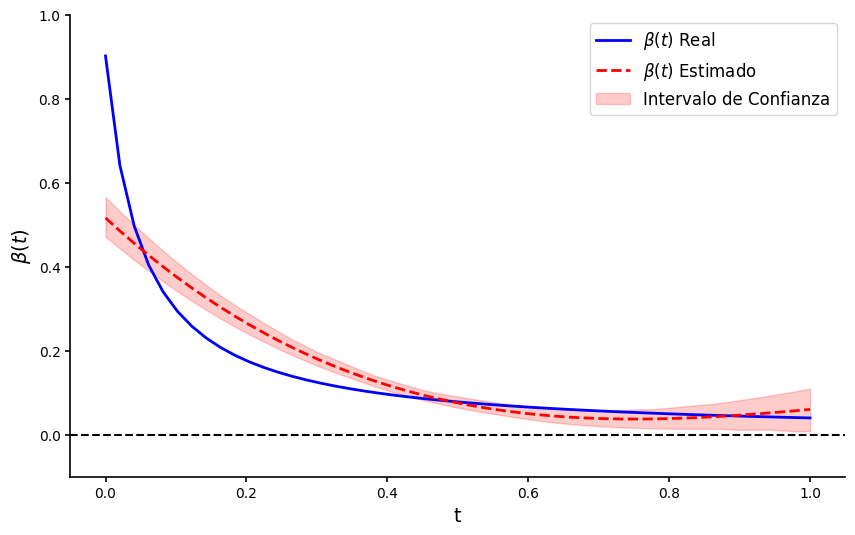

In [6]:
df = pd.read_csv("/Users/jesussecillamartinez/Desktop/Beca Colaboración/Fun_CPsplines/Simulaciones_Signo/datos_graficoPareto_Positiva_005_125_restricciones.csv")
Distribucion = "Pareto"
error = "005"
N = "125"
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, df["Beta_real"], label= r'$\beta(t)$ Real', color='blue', linewidth=2)
ax.plot(t, df["mean"], label= r'$\beta(t)$ Estimado', color='red', linestyle='--', linewidth=2)
ax.fill_between(t, df["lower"], df["upper"], color='red', alpha=0.2, label='Intervalo de Confianza')

 # Añadir etiquetas y título
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel(r'$\beta(t)$', fontsize=14)

ax.set_ylim(-0.1, 1)
plt.axhline(y=0, color='black', linestyle='--')
            
# Añadir la leyenda
ax.legend(fontsize=12)

            # Quitar la cuadrícula
ax.grid(False)

            # Estilo de los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.xaxis.set_tick_params(width=1.2)
ax.yaxis.set_tick_params(width=1.2)

plt.savefig("/Users/jesussecillamartinez/Desktop/Beca Colaboración/Fun_CPsplines/Simulaciones_Signo/graficos simulacion/"+ f"Grafico_estimacion_" + Distribucion + "_Positiva_" + error + "_" + N + "BERNSTEIN.png")

In [ ]:
IMSE_2_Restricciones_Normal# PARETO POSITIVA ERROR 005 SIN RESTRICCIONES

In [ ]:
IMSE_2_sd_Restricciones_Pareto

In [ ]:
MSE_Restricciones_Pareto

In [ ]:
MSE_sd_Restricciones_Pareto

In [ ]:
fig, ax = plt.subplots()
Beta_media = np.mean(Betas_est, axis=0)
ax.plot(Betas_est[7,:])
x = np.arange(len(Beta_media))
ax.plot(x, Beta_real, color='green', linestyle='dashed', label='Beta real')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev

Beta_media = np.mean(Betas_est, axis=0)
Beta_upp = np.percentile(Betas_est, 97.5, axis=0)
Beta_low = np.percentile(Betas_est, 2.5, axis=0)

# Crear un array con las coordenadas x para cada columna
x = np.arange(len(Beta_media))

# Crear la figura y los ejes
fig, ax = plt.subplots()

ax.plot(x, Beta_real, color='green', linestyle='dashed', label='Beta real')

# Pintar las medias como una línea continua
ax.plot(x, Beta_media, color='blue', linestyle='dashed', label='Medias')

# Pintar los intervalos de confianza como líneas discontinuas
ax.fill_between(x, Beta_low, Beta_upp, color='pink', alpha=0.5, label='Intervalo de confianza')

plt.axhline(y=0, color='r', linestyle='--')
# Añadir leyenda
ax.legend()

# plt.savefig(f"Grafico_estimacion_" + Distribucion + "_Positiva_" + error + "_" + N + "_restricciones.png")
# Mostrar el gráfico
plt.show()

print("Estimación de ", Distribucion, "Positiva con un error de", error, "con restricciones")
print('IMSE *1000 para N=',N,"-",IMSE.mean()*1000)
print('sd(IMSE) *1000 para N=',N, "-",stdev(IMSE)*1000)
print('MSE *1000 for N=',N,"-",  MSE.mean()*1000)
print('sd(MSE) *1000 para N=',N, "-", stdev(MSE)*1000)
print('Tiempo de estimación (Segundos) para N=',N,"-",Tiempo)